In [1]:
# Initialize Otter
import otter
grader = otter.Notebook()

# Homework 3: Visualization
## Due Date: Monday, October 21st, 11:59PM

## Collaboration Policy

Data science is a collaborative activity. While you may talk with others about
the homework, we ask that you **write your solutions individually**. If you do
discuss the assignments with others please **include their names** below.

**Collaborators**: *list  collaborators here*

## Introduction

Atmospheric loading of radiative ("greenhouse") gases, such as Carbon Dioxide and Methane, is having an increasingly apparent effect on global climate. One of the more straightforward consequences of this process is an increase in average temperatures. With few exceptions, this effect can be detected wherever you look at temperatures through time. However, there are other potential consequences of climate change as well, such as shift in patterns of rainfall. Unlike temperature, how rainfall will change with time is more challenging to predict, and might be more variable from one place to another. 

*NOTE*: You can make all plots using any combination of `matplotlib` and `seaborn`. **You will need to refer to each package's respective documentation (e.g. [seaborn](https://seaborn.pydata.org/index.html)) for this homework**. For example, the [documentation](https://seaborn.pydata.org/generated/seaborn.regplot.html) for `regplot` will have some useful examples that can help you on question 2. This is a common practice that should become familiar to you; there are many types of plots and many ways to alter their aesthetics, and learning how to figure these things out from the documentation is an essential skill.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
ap_temp = pd.read_csv("ap_temp.csv")
ap_temp.tail()

,Year,T,TM,Tm,PP,V,RA,SN,TS,FG,TN,GR,Airport
122,2018,18.0,23.0,14.2,208.79,12.0,37.0,0.0,2.0,44.0,0.0,0.0,LAX
123,2019,17.4,22.3,13.5,462.49,12.3,58.0,0.0,6.0,27.0,0.0,0.0,LAX
124,2020,17.7,23.1,13.7,224.52,11.4,33.0,0.0,2.0,60.0,0.0,0.0,LAX
125,2021,16.6,21.7,12.9,316.21,11.8,40.0,0.0,4.0,37.0,0.0,0.0,LAX
126,2022,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,LAX


#### Question 1

Create a scatterplot of Temperature (y; units are in C) as a function of Year (x) at **PDX only**. Ensure that the plot (and all plots for this HW) are properly labeled with a title and axis labels with units if relevant.

Text(0.5694444444444446, 0.5, 'T (C)')

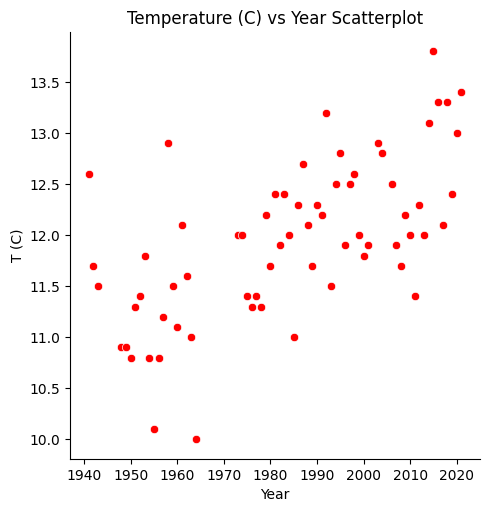

In [4]:
pdx = ap_temp[ap_temp["Airport"] == "PDX"]
sns.relplot(data = pdx, x = "Year", y = "T", color = "red") #assuming that T is the temperature in C
plt.title("Temperature (C) vs Year Scatterplot")
plt.xlabel("Year")
plt.ylabel("T (C)")

#### Question 2

The trend should generally appear positive *i.e.* that temperature is increasing with time at PDX. Because the relationship appears roughly linear, we could fit a simple linear model to better visualize that trend. 

Rather than find the model ourselves by solving for its parameters, using 'scikit-learn', or 'using statsmodel', use seaborn's `regplot` to visualize the relationship and plot a regression line automatically. Change the colors of the regression line and the points to anything you want, but make them different.

Text(0.5694444444444446, 0.5, 'T (C)')

<Figure size 640x480 with 0 Axes>

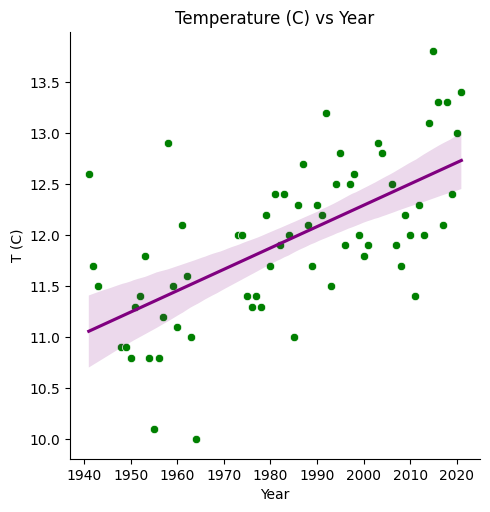

In [5]:
#help(sns.regplot)
plt.figure()
sns.relplot(data = pdx, x = "Year", y = "T", color = "Green") #assuming that T is the temperature in C
sns.regplot(data = pdx, x = "Year", y = "T", color = "purple", scatter = False)
plt.title("Temperature (C) vs Year")
plt.xlabel("Year")
plt.ylabel("T (C)")

#### Question 3

In addition to temperature, climate change is also thought to be influencing patterns of precipitation. Specifically, some places might get drier and some places might get wetter. 

First, create a new variable in the full data indicating whether the record was before 1985 (inclusive) or after 1985. 

In [6]:
leetcode = np.where(ap_temp["Year"] <= 1985, "Pre-1985", "Post-1985") #leetcode has taught me well, looping through for loop very slow
ap_temp["recent"] =  leetcode
ap_temp

,Year,T,TM,Tm,PP,V,RA,SN,TS,FG,TN,GR,Airport,recent
0,1936,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PDX,Pre-1985
1,1937,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PDX,Pre-1985
2,1938,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PDX,Pre-1985
3,1939,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PDX,Pre-1985
4,1940,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PDX,Pre-1985
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122,2018,18.0,23.0,14.2,208.79,12.0,37.0,0.0,2.0,44.0,0.0,0.0,LAX,Post-1985
123,2019,17.4,22.3,13.5,462.49,12.3,58.0,0.0,6.0,27.0,0.0,0.0,LAX,Post-1985
124,2020,17.7,23.1,13.7,224.52,11.4,33.0,0.0,2.0,60.0,0.0,0.0,LAX,Post-1985
125,2021,16.6,21.7,12.9,316.21,11.8,40.0,0.0,4.0,37.0,0.0,0.0,LAX,Post-1985


In [7]:
grader.check("q3")

q3 results: All test cases passed!

#### Question 4

Looking only at PDX, create two plots: a barplot of average annual temperatures before 1985 and after 1985; a boxplot of annual temperatures before 1985 and after 1985.

C:\Users\Andy Ho\AppData\Local\Temp\ipykernel_19920\4058071845.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pdx["recent"] = pdx_split


Text(0, 0.5, 'T (C)')

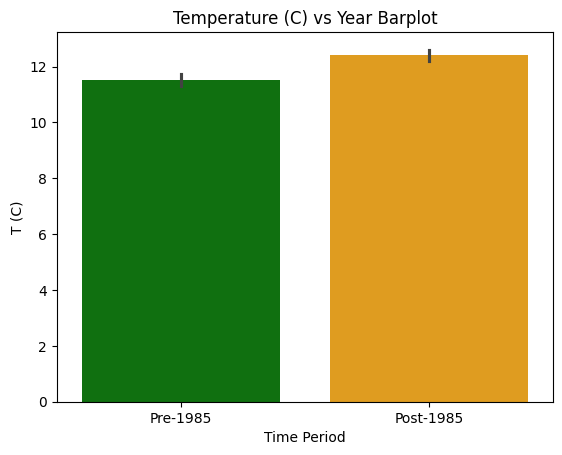

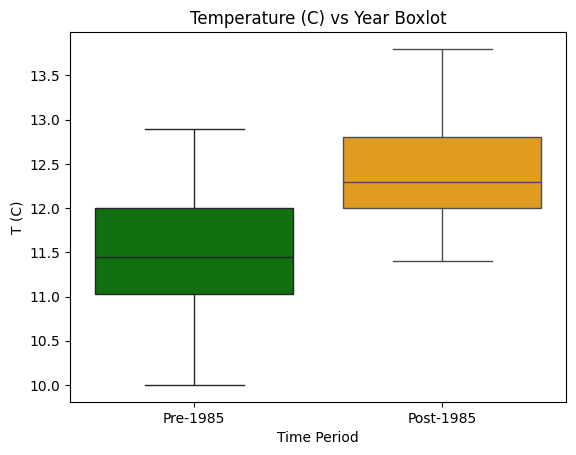

In [8]:
# Your boxplot
pdx_split = np.where(pdx["Year"] <= 1986, "Pre-1985", "Post-1985") #leetcode has taught me well, looping through for loop very slow...
pdx["recent"] = pdx_split

recent = pdx[pdx["recent"] == "Pre-1985"]
post = pdx[pdx["recent"] == "Post-1985"]

plt.figure()
sns.barplot(data = recent, x = "recent", y = "T", color = 'green')
sns.barplot(data = post, x = "recent", y = "T", color = 'orange')
plt.title("Temperature (C) vs Year Barplot")
plt.xlabel("Time Period")
plt.ylabel("T (C)")


plt.figure()
sns.boxplot(data = recent, x = "recent", y = "T", color = 'green')
sns.boxplot(data = post, x = "recent", y = "T", color = 'orange')
plt.title("Temperature (C) vs Year Boxlot")
plt.xlabel("Time Period")
plt.ylabel("T (C)")

#### Question 5

Which of these plots do you think better represents the relationship of interest? Why?

**Your response:** I think the plot that better represents the relationship is the boxplots. This is because just visually the barplot doesn't really make the impression that there is a change at all. However, once switched to the boxplot the realtionship is much clearer that the IQR's aren't the same, the range isn't the same, it's much more visually obvious with the boxplot that the two data sets are actually different. 

#### Question 6

Replot either the barplot or the boxplot but orient the plot horizontally instead of vertically. Check the functions documentation to determine how to do this. 

Text(0.5, 0, 'T (C)')

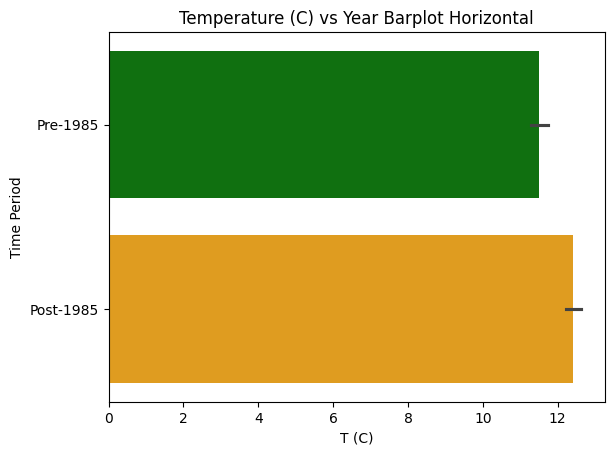

In [9]:
plt.figure()
sns.barplot(data = recent, y = "recent", x = "T", color = 'green', orient = 'h')
sns.barplot(data = post, y = "recent", x = "T", color = 'orange', orient = 'h')
plt.title("Temperature (C) vs Year Barplot Horizontal")
plt.ylabel("Time Period")
plt.xlabel("T (C)")

#### Question 7

Now create a single, grouped/paired boxplot (vertical or horizontal) showing the temperature at both PDX and LAX in both time periods. There should be 4 total boxes, and the boxplots should be grouped by airport.

Text(0, 0.5, 'Airports')

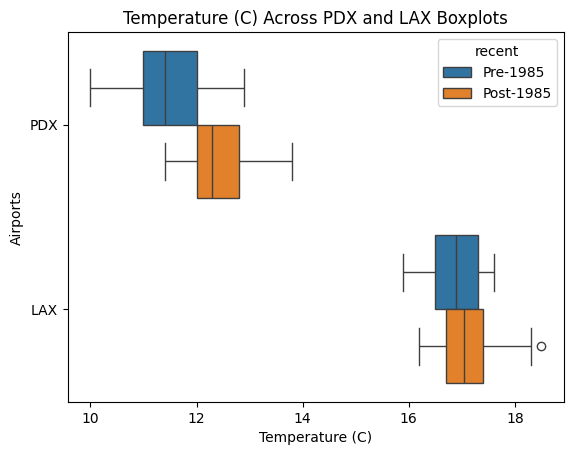

In [10]:
plt.figure()
testing = sns.boxplot(data = ap_temp, x = "T", y = "Airport", hue = "recent")
plt.title("Temperature (C) Across PDX and LAX Boxplots")
plt.xlabel("Temperature (C)")
plt.ylabel("Airports")


#### Question 8

Create a single `relplot` showing temperature `T` by year for both airports. Change the color of points based on their associated airports, and adjust the size of each point based on precipitation `PP`. Use a different color palette than the default one. 

In [11]:
color_pal = sns.color_palette('pastel')
color_pal #for changing the color later

[(0.6313725490196078, 0.788235294117647, 0.9568627450980393),
 (1.0, 0.7058823529411765, 0.5098039215686274),
 (0.5529411764705883, 0.8980392156862745, 0.6313725490196078),
 (1.0, 0.6235294117647059, 0.6078431372549019),
 (0.8156862745098039, 0.7333333333333333, 1.0),
 (0.8705882352941177, 0.7333333333333333, 0.6078431372549019),
 (0.9803921568627451, 0.6901960784313725, 0.8941176470588236),
 (0.8117647058823529, 0.8117647058823529, 0.8117647058823529),
 (1.0, 0.996078431372549, 0.6392156862745098),
 (0.7254901960784313, 0.9490196078431372, 0.9411764705882353)]

C:\Users\Andy Ho\AppData\Local\Temp\ipykernel_19920\3090293876.py:2: UserWarning: The palette list has more values (10) than needed (2), which may not be intended.
  sns.relplot(data = ap_temp, x = "Year", y = "T", hue = "Airport", size = "PP", palette = color_pal)


Text(0.5, 28.999999999999986, 'Year')

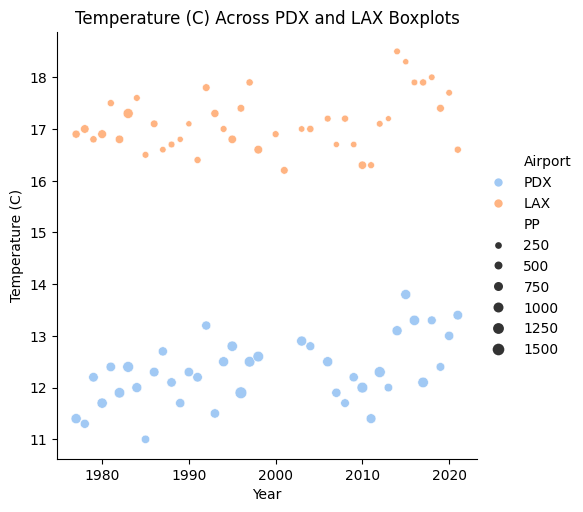

In [12]:
#sns.relplot(data = ap_temp, x = "T", 
sns.relplot(data = ap_temp, x = "Year", y = "T", hue = "Airport", size = "PP", palette = color_pal)
plt.title("Temperature (C) Across PDX and LAX Boxplots")
plt.ylabel("Temperature (C)")
plt.xlabel("Year")

#### Question 9.1

Now, create two plots, one for PDX (Portland) and one for LAX (Los Angeles). 

Each plot should show the **bivariate distributions of temperature (T) and precipitation (PP) for each time group** (before and after 1985) on the same plot. Check out Seaborn's [page on visualizing distributions](https://seaborn.pydata.org/tutorial/distributions.html) if you're not sure how to do this. 

Additionally, each plot should have **two points representing the averages of T and PP for each time group**. These will therefore represent the averages of each bivariate distribution. Ensure that the distributions and associated points **are different colors depending on whether they are from before or after 1985**. 

In [13]:
#first we need to get the points that are the averages for each of the two pdx and lax groups
lax = ap_temp[ap_temp["Airport"] == "LAX"] 
lax_old = lax[lax["recent"] == "Pre-1985"]
lax_new = lax[lax["recent"] != "Pre-1985"]

x_lax_old_avgs, y_lax_old_avgs = lax_old["T"].mean(), lax_old["PP"].mean()
x_lax_new_avgs, y_lax_new_avgs = lax_new["T"].mean(), lax_new["PP"].mean()

#Do the same for pdx,
pdx_old = pdx[pdx["recent"] == "Pre-1985"]
pdx_new = pdx[pdx["recent"] != "Pre-1985"]

x_pdx_old_avgs, y_pdx_old_avgs = (pdx_old["T"].mean(), pdx_old["PP"].mean())
x_pdx_new_avgs, y_pdx_new_avgs = (pdx_new["T"].mean(), pdx_new["PP"].mean())


Text(0.5, 1.0, 'Bivariate Plot for LAX')

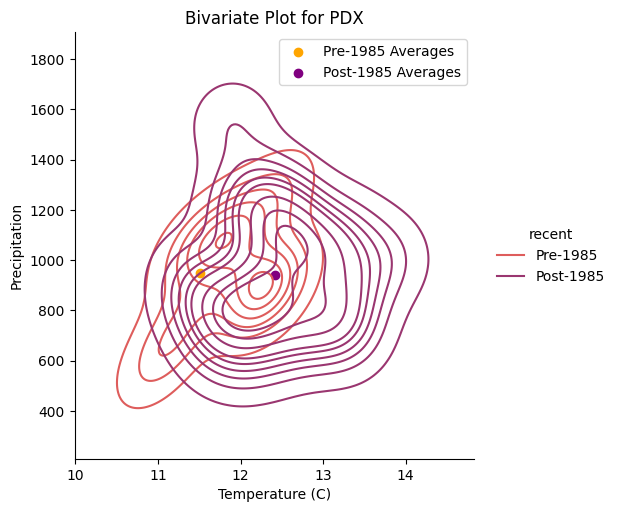

<Figure size 640x480 with 0 Axes>

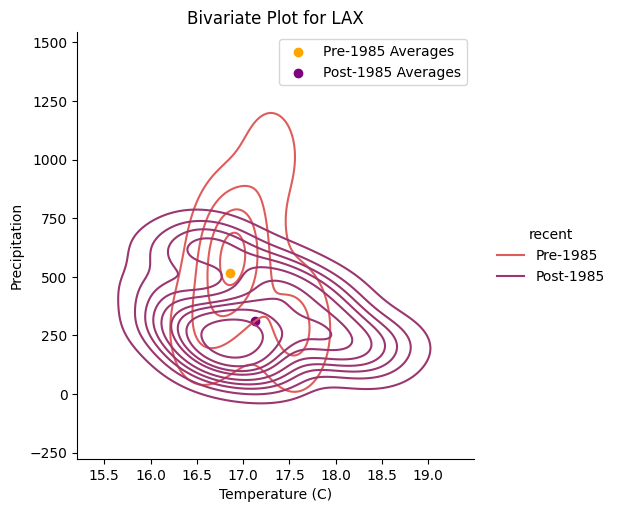

In [14]:
# PDX bivariate plot
sns.displot(data = pdx, x = "T", y = "PP", hue = "recent", palette = "flare",kind = 'kde') #i think the kde plots look the best
plt.title("Bivariate Plot for PDX")
plt.scatter(x_pdx_old_avgs,y_pdx_old_avgs, label = "Pre-1985 Averages", color = 'orange')
plt.scatter(x_pdx_new_avgs,y_pdx_new_avgs, label = "Post-1985 Averages", color = 'purple')
plt.legend()
plt.xlabel("Temperature (C)")
plt.ylabel("Precipitation")

plt.figure()

#LAX bivariate plot
sns.displot(data = lax, x = "T", y = "PP", hue = "recent", palette = "flare", kind = 'kde')
plt.scatter(x_lax_old_avgs,y_lax_old_avgs, label = "Pre-1985 Averages", color = 'orange')
plt.scatter(x_lax_new_avgs,y_lax_new_avgs, label = "Post-1985 Averages", color = 'purple')
plt.legend()

plt.title("Temperature (C) Across PDX and LAX Boxplots")
plt.xlabel("Temperature (C)")
plt.ylabel("Precipitation")
plt.title("Bivariate Plot for LAX")

#### Question 9.2

Looking at the bivariate distributions of climate at PDX and their centers, how would you say climate has changed at PDX from before 1985 to after 1985?

If you're unsure how to interpret the bivariate distributions, consider using scatterplots to help answer the question.

1. Climate has not changed
2. Climate has become warmer but not appreciably wetter or drier
3. Climate has become drier but not appreciably warmer or colder
4. Climate has become both warmer and drier
5. Climate has become both wetter and colder

In [15]:
ans_92 = 2

In [16]:
grader.check("q9_2")

q9_2 results: All test cases passed!

#### Question 9.3

Looking at the bivariate distributions of climate at LAX and their centers, how would you say climate has changed at LAX from before 1985 to after 1985?

Only select one answer, but there are two acceptable answers for this question.

1. Climate has not changed
2. Climate has become warmer but not appreciably wetter or drier
3. Climate has become drier but not appreciably warmer or colder
4. Climate has become both warmer and drier
5. Climate has become both wetter and colder

In [17]:
ans_93 = 4 #note to grader, I think this is an ambigious increase so it could just as easily be 3 but
#it depends on if that half degree increase is "appreicably warmer"

In [18]:
grader.check("q9_3")

q9_3 results: All test cases passed!

## Submission

Make sure you have run all cells in your notebook in order. Then execute the following two commands from the File menu:

* Save and Checkpoint
* Close and Halt

Then upload your .ipynb file to Canvas assignment HW3